In [144]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [122]:
data = {'A':[.0012,.0013,.0013,.0011,.0011,.0013,.0012,.0013,.0013,.0011,.0008,.0007,.0097,.0007,.0007,.0006,.0006,.0005,.0006,.0006,.0006,.0007,.0011,.0013,.0017],
        'B':[-.0032,.003,-.0004,-.0086,-.0018,.0115,.0074,.0034,.0082,-.0123,-.0145,-.0071,.075,.0014,.0099,-.0042,-.0003,-.0081,.0149,.0063,.0046,.0178,-.0064,.0182,.0191],
        'C':[.0448,-.0069,.007,-.0465,.0303,.0237,.0233,.0069,.0533,.0438,.0276,-.0101,.1831,.0384,.1095,-.0266,-.038,.0719,.0564,.0199,.0476,.1281,-.124,-.0824,-.0004],
        'D':[.0058,-.0503,.0543,-.004,.002,-.0124,.0346,-.0066,.0423,-.0039,.0521,.0285,.3185,.0724,.1826,.005,-.0304,.072,.0571,.04,.0879,.1581,-.214,-.0801,-.0062],
        'E':[.0510,-.0466,.0246,-.0281,.0176,.0072,-.0144,.0361,.0309,.0235,.0226,-.0109,.0817,.0464,.1554,-.0397,-.026,.0512,.0233,.0344,.045,.0642,-.1387,-.0774,-.0273]}    

In [123]:
df = pd.DataFrame(data)

In [124]:
return_data = df.to_numpy().T

In [125]:
investments = df.columns

In [126]:
r = np.asarray(np.mean(return_data, axis=1))

In [127]:
C = np.asmatrix(np.cov(return_data))

In [128]:
for j in range(len(investments)):
    print ('%s: Exp ret = %f, Variance = %f' %(investments[j],r[j], C[j,j]))

A: Exp ret = 0.001324, Variance = 0.000003
B: Exp ret = 0.005352, Variance = 0.000300
C: Exp ret = 0.023228, Variance = 0.004050
D: Exp ret = 0.032212, Variance = 0.009263
E: Exp ret = 0.012240, Variance = 0.003255


In [129]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.005

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])
    

In [130]:
prob.status
prob.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.00012870222420174453

Optimal portfolio
----------------------
 Investment in A : 74.4% of the portfolio
 Investment in B : 10.8% of the portfolio
 Investment in C : 14.8% of the portfolio
 Investment in D : 0.0% of the portfolio
 Investment in E : -0.0% of the portfolio
----------------------
Exp ret = 0.005000000000000001
Expected risk    = 0.00012870222420174453


In [141]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.01

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob2 = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [142]:
prob2.status
prob2.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.0006377741471984857

Optimal portfolio
----------------------
 Investment in A : 31.68% of the portfolio
 Investment in B : 35.18% of the portfolio
 Investment in C : 33.14% of the portfolio
 Investment in D : -0.0% of the portfolio
 Investment in E : 0.0% of the portfolio
----------------------
Exp ret = 0.01
Expected risk    = 0.0006377741471984857


In [133]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.015

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob3 = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [134]:
prob3.status
prob3.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.0015387789051004642

Optimal portfolio
----------------------
 Investment in A : 0.0% of the portfolio
 Investment in B : 46.03% of the portfolio
 Investment in C : 53.97% of the portfolio
 Investment in D : 0.0% of the portfolio
 Investment in E : 0.0% of the portfolio
----------------------
Exp ret = 0.015
Expected risk    = 0.0015387789051004642


In [135]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.02

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob4 = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [136]:
prob4.status
prob4.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.002901434740094829

Optimal portfolio
----------------------
 Investment in A : 0.0% of the portfolio
 Investment in B : 20.42% of the portfolio
 Investment in C : 74.88% of the portfolio
 Investment in D : 4.7% of the portfolio
 Investment in E : -0.0% of the portfolio
----------------------
Exp ret = 0.02
Expected risk    = 0.002901434740094829


In [137]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.025

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob5 = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [138]:
prob5.status
prob5.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.004753051232125642

Optimal portfolio
----------------------
 Investment in A : 0.0% of the portfolio
 Investment in B : 0.0% of the portfolio
 Investment in C : 80.28% of the portfolio
 Investment in D : 19.72% of the portfolio
 Investment in E : 0.0% of the portfolio
----------------------
Exp ret = 0.02500000000000001
Expected risk    = 0.004753051232125642


In [139]:
# Number of variables
n = len(investments)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.03

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob6 = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [140]:
prob6.status
prob6.solve()
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(investments)):
    print (" Investment in {} : {}% of the portfolio".format(investments[s],round(100*x.value[s],2)))
print ("----------------------")
print ("Exp ret = {}".format(ret.value))
print ("Expected risk    = {}".format(risk.value))

0.007598290355826174

Optimal portfolio
----------------------
 Investment in A : -0.0% of the portfolio
 Investment in B : -0.0% of the portfolio
 Investment in C : 24.62% of the portfolio
 Investment in D : 75.38% of the portfolio
 Investment in E : -0.0% of the portfolio
----------------------
Exp ret = 0.029999999999999995
Expected risk    = 0.007598290355826174


Text(0.5, 0, 'Variance')

Text(0, 0.5, 'Return')

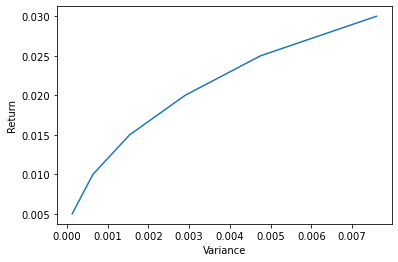

In [145]:
Variance = [0.00012870222420174453,0.0006377741471984857,0.0015387789051004642,0.002901434740094829,0.004753051232125642,0.007598290355826174]
Return = [0.005000000000000001,0.01,0.015,0.02,0.025,0.03]

plt.plot(Variance, Return)
plt.xlabel('Variance')
plt.ylabel('Return')